# DAND - Project 2 - Data Analysis

*This document and the accompanying files can be found on [GitHub](https://github.com/anenkov/dand-da-titanic)*

### This project will conduct a Data Analysis on the Titanic passengers' data

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Set seaborn plots
sns.set(style="whitegrid", context="talk")
sns.set_context(rc={"figure.figsize": (8, 4)})

# load the data
passengers_df = pd.read_csv("titanic_data.csv")

passengers_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


We are interested in several questions:
* Average survival rate and distribution in ages
* The survival rate of children (age 18 and under), adult males, adult females
* Survival rate by socio-economic status (Pclass)
* Does having Sibling or Spouse on the ship inrease/decrease survivability (SibSp > 0 or Parch > 0)
* Are there any tendencies for Port of Embarkation - e.g. survivors or dead concentration

In [3]:
print "Rows count:"
passengers_df.count()

Rows count:


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
survival_mean = passengers_df["Survived"].mean()
print "Survived {} out of {}".format(passengers_df["Survived"].sum(), passengers_df["Survived"].count())
print "Average probability of survival: {}".format(round(survival_mean, 2))

Survived 342 out of 891
Average probability of survival: 0.38


### Survivability by age bins

In [5]:
# separate survivors and non survivors
survivors = passengers_df[passengers_df["Survived"] > 0]
non_survivors = passengers_df[passengers_df["Survived"] == 0]

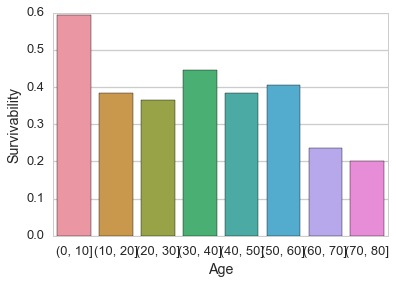

In [6]:
%matplotlib inline
# take all the passengers with 'Age' cleaning the NaN values
df_with_ages = passengers_df[pd.notnull(passengers_df['Age'])]

# group them by 10 years 
group_by_age = df_with_ages.groupby(
    pd.cut(df_with_ages['Age'], np.arange(0, 90, 10), include_lowest=False)
)

# Visualize age groups survivability
ax = sns.barplot(data=pd.DataFrame(group_by_age['Survived'].mean()).T)
ax.set_ylabel("Survivability")

### Survivability split in children, adult males and adult females

In [7]:
# get datasets with children, males, females
children = df_with_ages[(df_with_ages['Age'] <= 18)]
adult_males = df_with_ages[(df_with_ages['Age'] > 18) & (df_with_ages['Sex'] == 'male')]
adult_females = df_with_ages[(df_with_ages['Age'] > 18) & (df_with_ages['Sex'] == 'female')]

# Combine the mean data into a dataframe
surv_data = pd.DataFrame([
        [children['Survived'].mean(),adult_males['Survived'].mean(), adult_females['Survived'].mean()]
    ], index=["Survivability"], columns=["Children", "Adult males", "Adult females"]).round(2)
surv_data

,Children,Adult males,Adult females
Survivability,0.5,0.18,0.78


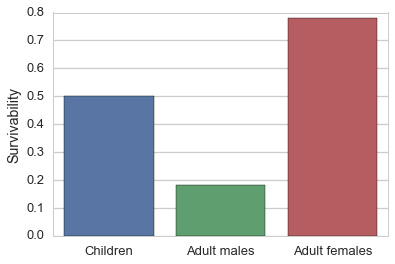

In [8]:
# Visualize the survivability mean
ax = sns.barplot(data=surv_data)
ax.set_ylabel("Survivability")

### Survival rate by socio-economic status (Pclass)

In [9]:
# Group passengers by Pclass and calculate the mean of survivability for each Pclass
class_surv_data = pd.DataFrame(passengers_df.groupby('Pclass')['Survived'].mean()).T
class_surv_data

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


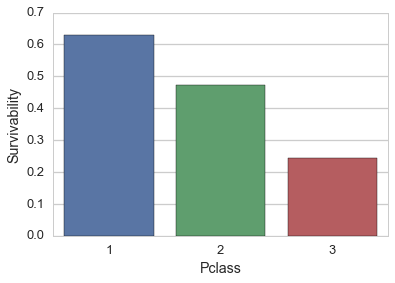

In [10]:
ax = sns.barplot(data=class_surv_data)
ax.set_ylabel("Survivability")

### Here we'll test if the chance of surviving between those who have relatives and those who don't is statistically significant at α = 0.01

In [11]:
print u'H\u2080: \u039Chr = \u039cnhr          H\u2081: \u039Chr \u2260 \u039cnhr          \u03B1 = .01'

H₀: Μhr = Μnhr          H₁: Μhr ≠ Μnhr          α = .01


In [12]:
# separate those having relatives (hr) from those who don't (nhr)
having_relatives = passengers_df[(passengers_df['SibSp'] > 0) | (passengers_df['Parch'] > 0)]['Survived']
not_having_relatives = passengers_df[(passengers_df['SibSp'] == 0) & (passengers_df['Parch'] == 0)]['Survived']

print having_relatives.describe()
print not_having_relatives.describe()

count    354.000000
mean       0.505650
std        0.500676
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
count    537.000000
mean       0.303538
std        0.460214
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [13]:
## Get the means
hr_xbar = having_relatives.mean()
nhr_xbar = not_having_relatives.mean()

# Calculate Sum of Squares for samples
ss_hr = np.sum((having_relatives - hr_xbar) ** 2)
ss_nhr = np.sum((not_having_relatives - nhr_xbar) ** 2)

# Degree of Freedom
dof = having_relatives.count() + not_having_relatives.count() - 2
print "Degree of freedom: {}".format(dof)
# Pooled Variance
pooled_var = (ss_hr + ss_nhr)/dof

# Standared Error
st_err = math.sqrt(pooled_var/having_relatives.count() + pooled_var/not_having_relatives.count())

# t-statistic
t_statistic = (hr_xbar - nhr_xbar)/st_err
print "t-statistic: {}".format(round(t_statistic,2))

# t-critical 
t_critical = 2.581
print "t-critical: {}".format(t_critical)

# Margin of Error
margin_of_error = t_critical * st_err

Degree of freedom: 889
t-statistic: 6.19
t-critical: 2.581


** The two-tailed P value is less than 0.0001 **  
** By conventional criteria, this difference is considered to be extremely statistically significant. **  
** *Based on the result Μhr ≠ Μnhr and we can reject the null hypotheses. * **

In [14]:
CI_left = hr_xbar - nhr_xbar - margin_of_error
CI_right = hr_xbar - nhr_xbar + margin_of_error
print "CI(99%) = ({}, {})".format(CI_left, CI_right)

CI(99%) = (0.117879804282, 0.286343280653)


** *We are 99% sure that people who have relatives on criuses have between 12% and 29% higher chance of surviving in case of a shipwreck* **

In [15]:
# Another way of computing the t-statistic and p-value would be this one 
# but I did the above because of the confidence intervals
t, p = ttest_ind(having_relatives, not_having_relatives)
"t-statistic: {}, p-value: {}".format(t,p)

't-statistic: 6.19303248808, p-value: 9.00949017933e-10'

### Examine distribution of people on embarkment

In [16]:
# Get the means
embarkation_mean = passengers_df.groupby('Embarked').mean()[['Survived', 'Pclass', 'Fare','Age']]
embarkation_mean

,Survived,Pclass,Fare,Age
Embarked,,,,
C,0.553571,1.886905,59.954144,30.814769
Q,0.389610,2.909091,13.276030,28.089286
S,0.336957,2.350932,27.079812,29.445397


The only interesting thing we can see from the above table is that most of the people that have been Embarked in Cherbourg were rich. But from the table below we can see they were not as many as Southampton

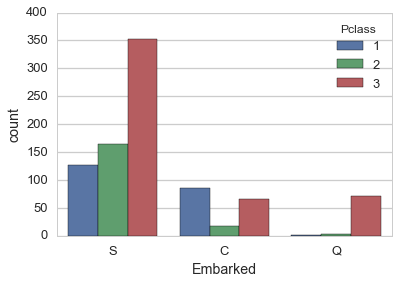

In [17]:
# Display distribution by Pclass
sns.countplot(x="Embarked", hue="Pclass", data=passengers_df);

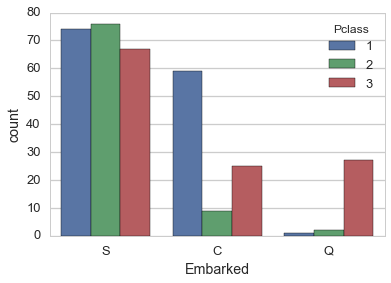

In [18]:
# Display survivors location
sns.countplot(x="Embarked", hue="Pclass", data=passengers_df[passengers_df['Survived'] == 1], order=['S', 'C', 'Q'])

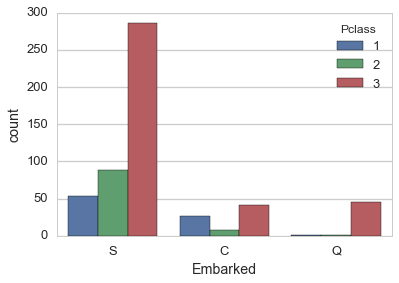

In [19]:
# Display non-survivors location
sns.countplot(x="Embarked", hue="Pclass", data=passengers_df[passengers_df['Survived'] != 1], order=['S', 'C', 'Q']);

We can see from the above graphics that most bodies Embarked in Southampton

Sources:
  1. [Titanic passengers' data and description](https://www.kaggle.com/c/titanic/data)